<a href="https://colab.research.google.com/github/st2-0-3-1-0-2-8-4/CMP7005_S2_PRAC1/blob/main/CMP7005_S2_PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Import the necessary Libraries:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Loading the Pandas dataframe:**

In [18]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("combined_output.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [19]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
140251,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
140252,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
140253,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
140254,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
140255,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


In [36]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

### **Exploratory Data Analysis**

In [4]:
df.shape

(140256, 18)

In [37]:
#shows columns in list format
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'PM', 'Date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       140256 non-null  int64  
 1   year     140256 non-null  int64  
 2   month    140256 non-null  int64  
 3   day      140256 non-null  int64  
 4   hour     140256 non-null  int64  
 5   PM2.5    136819 non-null  float64
 6   PM10     137832 non-null  float64
 7   SO2      136538 non-null  float64
 8   NO2      135561 non-null  float64
 9   CO       133479 non-null  float64
 10  O3       135168 non-null  float64
 11  TEMP     140083 non-null  float64
 12  PRES     140082 non-null  float64
 13  DEWP     140078 non-null  float64
 14  RAIN     140087 non-null  float64
 15  wd       139231 non-null  object 
 16  WSPM     140107 non-null  float64
 17  station  140256 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 19.3+ MB


### **Total Number of cities in the dataset**

In [7]:
stations = df['station'].value_counts()
print(f'Total number of stations in the dataset : {len(stations)}')
stations

Total number of stations in the dataset : 4


,count
station,
Gucheng,35064
Shunyi,35064
Huairou,35064
Aotizhongxin,35064


### **Look at the missing values**

In [8]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        print(mis_val_table)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Oranges')

            0         1
No          0  0.000000
year        0  0.000000
month       0  0.000000
day         0  0.000000
hour        0  0.000000
PM2.5    3437  2.450519
PM10     2424  1.728268
SO2      3718  2.650867
NO2      4695  3.347450
CO       6777  4.831879
O3       5088  3.627652
TEMP      173  0.123346
PRES      174  0.124059
DEWP      178  0.126911
RAIN      169  0.120494
wd       1025  0.730807
WSPM      149  0.106234
station     0  0.000000


,Missing Values,% of Total Values
CO,6777,4.831879
O3,5088,3.627652
NO2,4695,3.347450
SO2,3718,2.650867
PM2.5,3437,2.450519
PM10,2424,1.728268
wd,1025,0.730807
DEWP,178,0.126911
PRES,174,0.124059
TEMP,173,0.123346


In [22]:
df['PM']=df['PM10']+df['PM2.5']


## **Creating New DataFrame for Air Quality Index**

In [40]:
selected_columns = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10', 'PM', 'wd', 'DEWP', 'PRES', 'TEMP', 'RAIN', 'WSPM', 'year', 'day', 'month', 'hour', 'Date', 'station']

# Create a new DataFrame with only the selected columns
df1 = df[selected_columns]

# Display the first few rows of the new DataFrame
df1.head()


,CO,O3,NO2,SO2,PM2.5,PM10,PM,wd,DEWP,PRES,TEMP,RAIN,WSPM,year,day,month,hour,Date,station
0,800.0,88.0,NaN,5.0,6.0,18.0,24.0,NW,-18.6,1021.1,0.1,0.0,4.4,2013,1,3,0,2013-03-01,Gucheng
1,800.0,88.0,NaN,5.0,6.0,15.0,21.0,NW,-19.0,1021.5,-0.3,0.0,4.0,2013,1,3,1,2013-03-01,Gucheng
2,700.0,52.0,NaN,NaN,5.0,18.0,23.0,WNW,-19.8,1021.5,-0.7,0.0,4.6,2013,1,3,2,2013-03-01,Gucheng
3,NaN,NaN,NaN,6.0,6.0,20.0,26.0,W,-21.2,1022.7,-1.0,0.0,2.8,2013,1,3,3,2013-03-01,Gucheng
4,600.0,73.0,NaN,5.0,5.0,17.0,22.0,WNW,-21.4,1023.0,-1.3,0.0,3.6,2013,1,3,4,2013-03-01,Gucheng


In [24]:
# Missing values
def missing_values_table(df1):
        # Total missing values
        mis_val = df1.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df1.isnull().sum() / len(df1)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df1)
missing_values.style.background_gradient(cmap='Oranges')

,Missing Values,% of Total Values
CO,6777,4.831879
O3,5088,3.627652
NO2,4695,3.347450
SO2,3718,2.650867
PM,3512,2.503993
PM2.5,3437,2.450519
PM10,2424,1.728268
wd,1025,0.730807
DEWP,178,0.126911
PRES,174,0.124059


## **Imputing missing values**

### **Mean/Median/Mode Imputation**
* **Mean:** Replace missing values with the mean of the column.

* **Median**: Replace missing values with the median of the column. This is useful if your data has outliers, as the median is less sensitive to them.

* **Mode:** Replace missing values with the mode (most frequent value) of the column. This is often used for categorical variables but can be applied to numerical data as well.

In [46]:
pollutants = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10', 'PM']
dff= df1.groupby(['year','month','station', 'Date'])[pollutants].mean().reset_index()
dff

,year,month,station,Date,CO,O3,NO2,SO2,PM2.5,PM10,PM
0,2013,3,Aotizhongxin,2013-03-01,429.166667,63.875000,22.583333,11.708333,7.125000,10.750000,17.875000
1,2013,3,Aotizhongxin,2013-03-02,824.916667,29.750000,66.666667,36.625000,30.750000,42.083333,72.833333
2,2013,3,Aotizhongxin,2013-03-03,1620.625000,19.125000,81.000000,61.291667,76.916667,120.541667,197.458333
3,2013,3,Aotizhongxin,2013-03-04,629.166667,53.750000,46.685171,22.166667,22.708333,44.583333,67.291667
4,2013,3,Aotizhongxin,2013-03-05,2357.958333,68.458333,132.833333,93.875000,148.875000,183.791667,332.666667
...,...,...,...,...,...,...,...,...,...,...,...
5839,2017,2,Shunyi,2017-02-24,883.333333,47.416667,41.916667,9.208333,24.791667,31.375000,56.166667
5840,2017,2,Shunyi,2017-02-25,587.500000,51.458333,41.833333,8.416667,16.458333,25.375000,41.833333
5841,2017,2,Shunyi,2017-02-26,675.000000,49.625000,46.708333,12.541667,28.083333,41.750000,69.833333
5842,2017,2,Shunyi,2017-02-27,1487.500000,24.208333,83.916667,20.375000,73.333333,88.750000,162.083333


In [44]:
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['PM']=df1['PM'].fillna((df1['PM'].median()))
df1['TEMP']=df1['TEMP'].fillna((df1['TEMP'].median()))
df1['PRES']=df1['PRES'].fillna((df1['PRES'].median()))
df1['DEWP']=df1['DEWP'].fillna((df1['DEWP'].median()))
df1['RAIN']=df1['RAIN'].fillna((df1['RAIN'].median()))
df1['wd']=df1['wd'].fillna((df1['wd'].mode()))
df1['WSPM']=df1['WSPM'].fillna((df1['WSPM'].median()))


In [41]:
df1

,CO,O3,NO2,SO2,PM2.5,PM10,PM,wd,DEWP,PRES,TEMP,RAIN,WSPM,year,day,month,hour,Date,station
0,800.0,88.0,NaN,5.0,6.0,18.0,24.0,NW,-18.6,1021.1,0.1,0.0,4.4,2013,1,3,0,2013-03-01,Gucheng
1,800.0,88.0,NaN,5.0,6.0,15.0,21.0,NW,-19.0,1021.5,-0.3,0.0,4.0,2013,1,3,1,2013-03-01,Gucheng
2,700.0,52.0,NaN,NaN,5.0,18.0,23.0,WNW,-19.8,1021.5,-0.7,0.0,4.6,2013,1,3,2,2013-03-01,Gucheng
3,NaN,NaN,NaN,6.0,6.0,20.0,26.0,W,-21.2,1022.7,-1.0,0.0,2.8,2013,1,3,3,2013-03-01,Gucheng
4,600.0,73.0,NaN,5.0,5.0,17.0,22.0,WNW,-21.4,1023.0,-1.3,0.0,3.6,2013,1,3,4,2013-03-01,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,400.0,95.0,35.0,5.0,12.0,29.0,41.0,NW,-16.2,1013.5,12.5,0.0,2.4,2017,28,2,19,2017-02-28,Aotizhongxin
140252,500.0,81.0,45.0,7.0,13.0,37.0,50.0,WNW,-15.1,1013.6,11.6,0.0,0.9,2017,28,2,20,2017-02-28,Aotizhongxin
140253,700.0,58.0,66.0,10.0,16.0,37.0,53.0,NW,-13.3,1014.2,10.8,0.0,1.1,2017,28,2,21,2017-02-28,Aotizhongxin
140254,700.0,35.0,87.0,12.0,21.0,44.0,65.0,NNW,-12.9,1014.4,10.5,0.0,1.2,2017,28,2,22,2017-02-28,Aotizhongxin


In [26]:
# Missing values
def missing_values_table(df1):
        # Total missing values
        mis_val = df1.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df1.isnull().sum() / len(df1)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df1)
missing_values.style.background_gradient(cmap='Oranges')

,Missing Values,% of Total Values
CO,6777,4.831879
O3,5088,3.627652
NO2,4695,3.347450
SO2,3718,2.650867
PM,3512,2.503993
PM2.5,3437,2.450519
PM10,2424,1.728268
wd,1025,0.730807
DEWP,178,0.126911
PRES,174,0.124059


In [27]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CO,133479.0,1199.053297,1134.246351,100.0000,500.00,900.0000,1500.00,10000.0
O3,135168.0,57.278914,56.145338,0.2142,11.00,45.0000,82.00,450.0
NO2,135561.0,47.996671,34.735549,1.0265,20.00,40.4441,68.00,290.0
SO2,136538.0,14.614849,20.778357,0.2856,2.00,6.0000,18.00,500.0
PM2.5,136819.0,78.947896,79.692862,2.0000,20.00,55.0000,110.00,941.0
PM10,137832.0,104.818173,91.869586,2.0000,35.00,83.0000,148.00,999.0
PM,136744.0,183.860418,166.118410,4.0000,58.00,141.0000,257.00,1761.0
DEWP,140078.0,2.609412,13.817141,-43.4000,-8.90,3.2000,15.30,29.1
PRES,140082.0,1010.334617,10.414055,982.8000,1002.00,1010.0000,1018.40,1042.8
TEMP,140083.0,13.320690,11.495130,-19.9000,3.00,14.3000,23.10,41.6


# **Key Insights from the Summary Statistics:**

**Date Range & Trends**
The dataset spans from March 1, 2013, to Febraury 28, 2017.
The median date (~December 31, 2014) suggests that most data points are centered around 2015-2017.

**PM2.5 & PM10 Levels (Air Pollution Indicators)**

**PM2.5 Mean:** 78.95 µg/m³ (with a max of 941.00 µg/m³ which indicates an extreme pollution event). Levels above 35 µg/m³ are considered unhealthy and precautions should be taken like wearing a face mask.

**PM10 Mean:** 104.82 µg/m³ (with a max of 999.00 that is considered hazardous for human health).

High standard deviation (79.69 for PM2.5 and 91.87 for PM10) suggest high air quality variations.

**Other Pollutants**

**CO (Carbon Monoxide):** Mean 1199.05 is considered potentially dangerous and can harm susceptible individuals (with a max of 10,000 which is considered hazardous).

**O3 (Ozone):** Mean 57.28 is considered moderate, max 450.00 that is considered very high and is dangerous to all and a health warning should be considered.

**Nitric Oxide (NO2):** Mean 50.00 is considered generally safe but prolonged exposure can affect vulnerable people, max 290.00 is considered concerning for human health.

**SO2 (Sulfur Dioxide):** Mean 14.61is considered good air quality, max 500 represents a significant concern.

**Final Thoughts:**

The data suggests severe air pollution events, with occasional hazardous levels.
High variability across pollutants implies that air quality is affected by multiple factors (seasonal changes, industrial activity, and vehicular emissions).

Further EDA with time-series analysis can help identify pollution trends and their causes.

### **Subsetting columns**
Even though a lot of columns have been provided in the dataset, we shall select a few prominent ones. Let's create a new dataframe called pollutants containg the major pollutants responsible for air pollution.

In [28]:
pollutants = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10', 'PM']

In [38]:
df1.columns

Index(['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10', 'PM', 'wd', 'DEWP', 'PRES',
       'TEMP', 'RAIN', 'WSPM', 'year', 'day', 'month', 'hour', 'station'],
      dtype='object')

### **Visualisation of each pollutants (using daily data)**

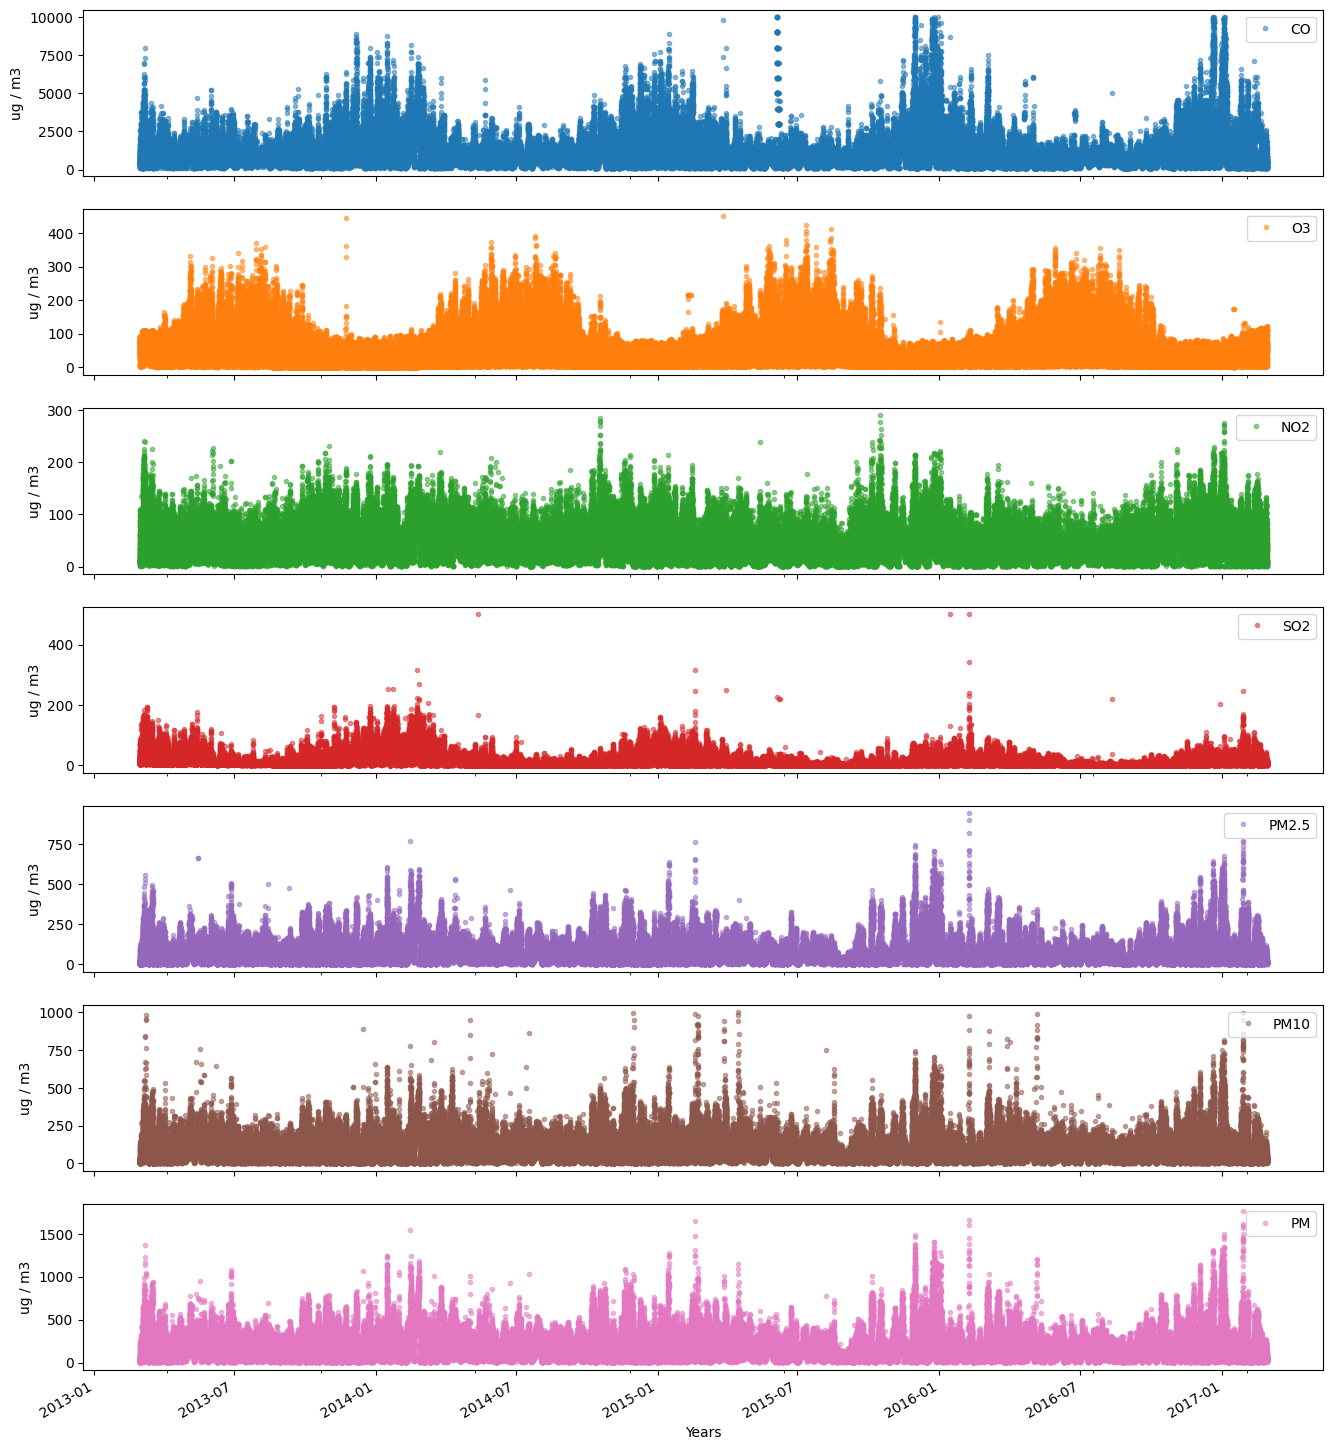

In [42]:
df1.set_index('Date',inplace=True)
axes = df1[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [45]:
df1

,CO,O3,NO2,SO2,PM2.5,PM10,PM,wd,DEWP,PRES,TEMP,RAIN,WSPM,year,day,month,hour,station
Date,,,,,,,,,,,,,,,,,,
2013-03-01,800.0,88.0,40.4441,5.0,6.0,18.0,24.0,NW,-18.6,1021.1,0.1,0.0,4.4,2013,1,3,0,Gucheng
2013-03-01,800.0,88.0,40.4441,5.0,6.0,15.0,21.0,NW,-19.0,1021.5,-0.3,0.0,4.0,2013,1,3,1,Gucheng
2013-03-01,700.0,52.0,40.4441,6.0,5.0,18.0,23.0,WNW,-19.8,1021.5,-0.7,0.0,4.6,2013,1,3,2,Gucheng
2013-03-01,900.0,45.0,40.4441,6.0,6.0,20.0,26.0,W,-21.2,1022.7,-1.0,0.0,2.8,2013,1,3,3,Gucheng
2013-03-01,600.0,73.0,40.4441,5.0,5.0,17.0,22.0,WNW,-21.4,1023.0,-1.3,0.0,3.6,2013,1,3,4,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28,400.0,95.0,35.0000,5.0,12.0,29.0,41.0,NW,-16.2,1013.5,12.5,0.0,2.4,2017,28,2,19,Aotizhongxin
2017-02-28,500.0,81.0,45.0000,7.0,13.0,37.0,50.0,WNW,-15.1,1013.6,11.6,0.0,0.9,2017,28,2,20,Aotizhongxin
2017-02-28,700.0,58.0,66.0000,10.0,16.0,37.0,53.0,NW,-13.3,1014.2,10.8,0.0,1.1,2017,28,2,21,Aotizhongxin


### **Monthwise Plot**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX', 'AQI']
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
#df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year and month, and calculating mean for each pollutant
df1['Month'] = df1['Date'].dt.to_period('M')
df_monthly = df1.groupby('Month')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Pollutant Levels by Month"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_monthly.index.astype(str),  # Convert PeriodIndex to string for x-axis
            y=df_monthly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Month-wise Pollutant Levels",
    xaxis_title="Month",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df1 and pollutants are already defined
# Group by Year and Month to calculate the monthly average for each pollutant
monthly_avg = df1.groupby(['Year', 'month'])[pollutants].mean().reset_index()

# Create a Date column from Year and Month
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['Year', 'month']].assign(DAY=1))

# Create subplots for each pollutant
fig = make_subplots(rows=len(pollutants), cols=1, subplot_titles=[f'{pollutant} Monthly Average Concentration Over Time' for pollutant in pollutants])

# Add traces for each pollutant
for i, pollutant in enumerate(pollutants):
    fig.add_trace(
        go.Scatter(
            x=monthly_avg['Date'],
            y=monthly_avg[pollutant],
            mode='lines+markers',
            name=pollutant,
            line=dict(color='blue', width=2),
            marker=dict(size=8),
            opacity=0.7
        ),
        row=i+1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Monthly Average Concentrations of Pollutants Over Time',
    title_font_size=24,
    showlegend=False,
    height=300 * len(pollutants),  # Adjust height based on the number of pollutants
    width=1000
)

# Update y-axis labels
for i, pollutant in enumerate(pollutants):
    fig.update_yaxes(title_text=f'{pollutant} (ug/m3)', row=i+1, col=1)

# Update x-axis labels
fig.update_xaxes(title_text='Date', row=len(pollutants), col=1)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [ ]:
monthly_avg

,Year,month,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI,Date
0,2015,1,67.622290,121.941822,68.545187,26.679065,7.399486,26.267850,29.469953,9.404112,153.747664,2015-01-01
1,2015,2,72.233776,115.574235,69.823418,29.429643,6.997296,20.054898,34.448520,13.475612,199.346939,2015-02-01
2,2015,3,73.978065,101.303502,61.095300,18.542627,6.268341,16.776175,38.082488,13.793687,190.230415,2015-03-01
3,2015,4,64.247667,108.867333,60.010286,18.703810,3.637667,16.713476,38.574381,9.431381,177.733333,2015-04-01
4,2015,5,60.904516,120.732949,65.819724,21.851889,4.204516,14.447235,37.897281,9.460138,182.092166,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
62,2020,3,41.973141,87.285490,64.217877,20.239472,1.129812,13.173894,34.807927,11.875314,110.737437,2020-03-01
63,2020,4,31.850538,71.502077,48.213936,17.701769,0.751000,10.992487,35.294038,9.416603,89.124359,2020-04-01
64,2020,5,28.510496,71.769318,49.598871,15.176067,0.717221,10.236154,36.374194,10.133610,88.356079,2020-05-01
65,2020,6,26.425833,64.559949,44.495859,14.206756,0.729949,9.945026,31.344064,11.019577,78.571795,2020-06-01


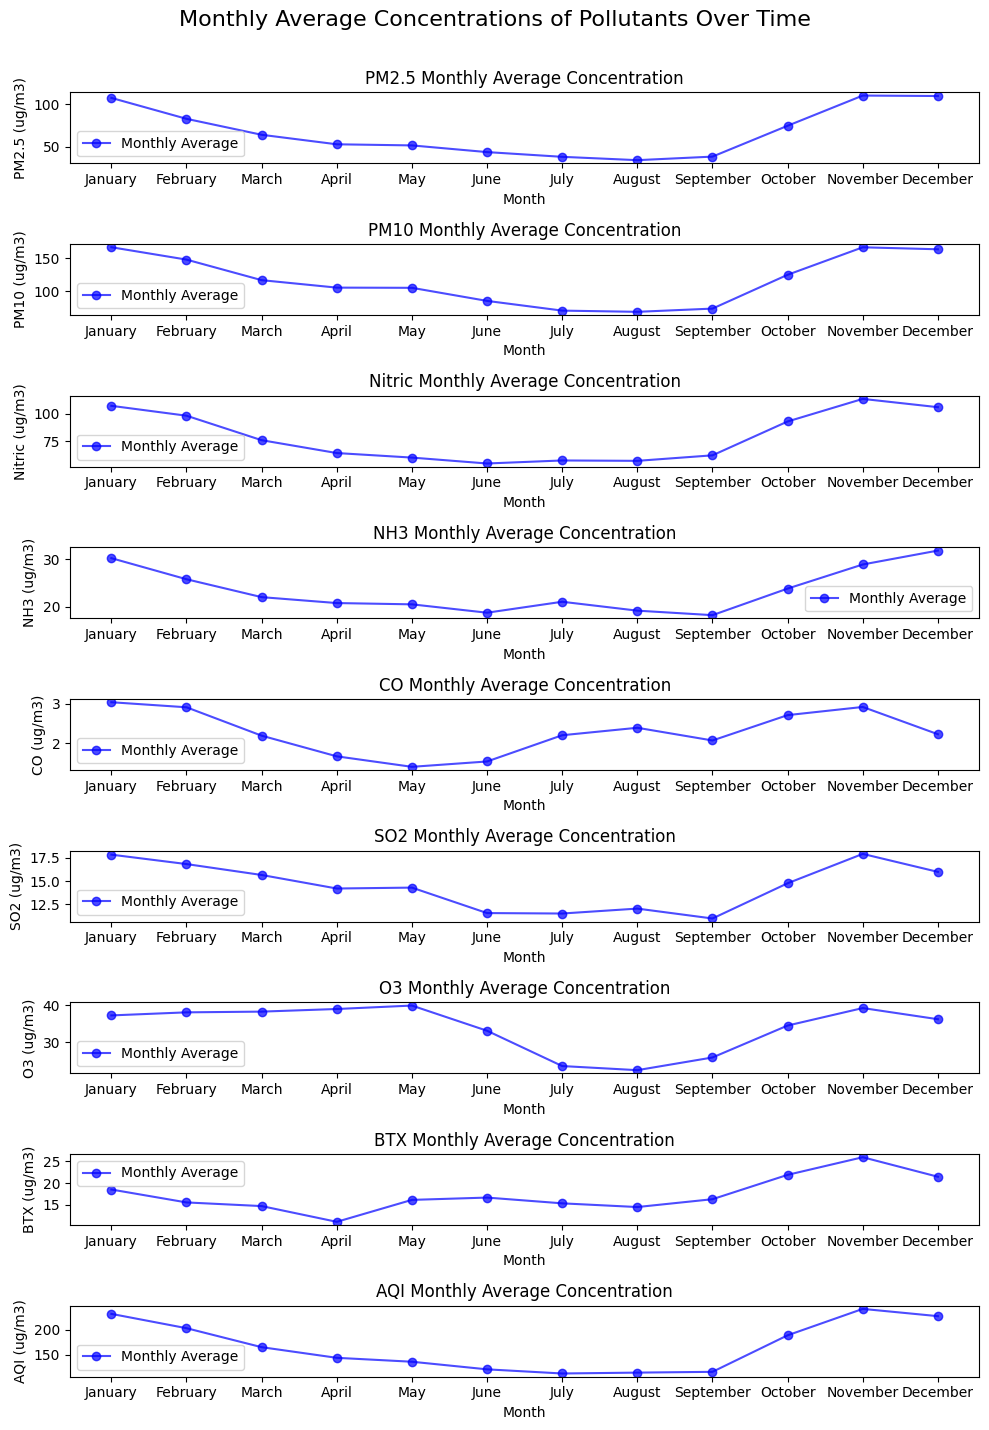

In [ ]:
# Group by Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby('month')[pollutants].mean()

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is in datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX', 'AQI']
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year, and calculating mean for each pollutant
df1['Year'] = df1['Date'].dt.year
df_yearly = df1.groupby('Year')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Yearly Pollutant Levels"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_yearly.index.astype(str),  # Convert Year to string for x-axis
            y=df_yearly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Yearly Pollutant Levels",
    xaxis_title="Year",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


## **Most Dominant Pollutants:**

In [ ]:
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']
pol=df1[pollutants].mean()
pollutants_df=pol.to_frame().reset_index()
pollutants_df.columns=['Pollutant','Level']
pollutants_df

,Pollutant,Level
0,PM2.5,64.510857
1,PM10,109.659366
2,Nitric,75.565432
3,NH3,20.813789
4,CO,2.153872
5,SO2,13.830897
6,O3,33.994121
7,BTX,12.382116


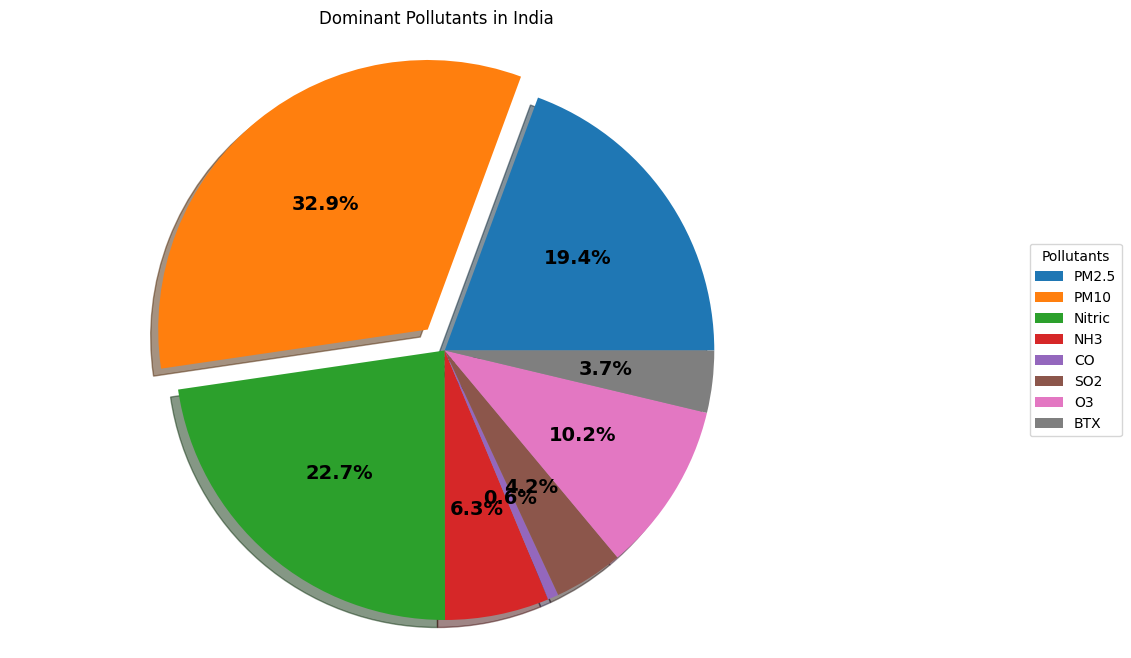

In [ ]:
plt.figure(figsize=(11,8))

labels = pollutants_df['Pollutant']
explode = [0, 0.1, 0, 0, 0, 0, 0,0]  # Exploding the first slice (PM2.5)

plt.title('Dominant Pollutants in India')
wedges, texts, autotexts = plt.pie(
    pollutants_df['Level'],
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    startangle=0
)

plt.axis('equal')  # Ensures the pie chart is drawn as a circle

# Adding legend
plt.legend(
    wedges,
    labels,
    title="Pollutants",
    loc="center",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Setting the properties of the percentage texts
plt.setp(autotexts, size=14, weight='bold')

# Display the plot
plt.show()

## **Dominant Pollutant citywise**

In [ ]:
import pandas as pd

pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Group data by 'State' and calculate the mean of each pollutant
statewise_pollution_means = df1.groupby('City')[pollutants].mean()

# Find the dominant pollutant in each state
dominant_pollutant_by_state = statewise_pollution_means.idxmax(axis=1)

# Convert the result to a DataFrame for better readability
dominant_pollutant_df = dominant_pollutant_by_state.reset_index()
dominant_pollutant_df.columns = ['City', 'Dominant Pollutant']

# Display the results
dominant_pollutant_df


,City,Dominant Pollutant
0,Ahmedabad,Nitric
1,Aizawl,PM10
2,Amaravati,PM10
3,Amritsar,PM10
4,Bengaluru,PM10
5,Bhopal,PM10
6,Brajrajnagar,PM10
7,Chandigarh,PM10
8,Chennai,PM10
9,Coimbatore,Nitric


## **Correlation between the different Pollutants**

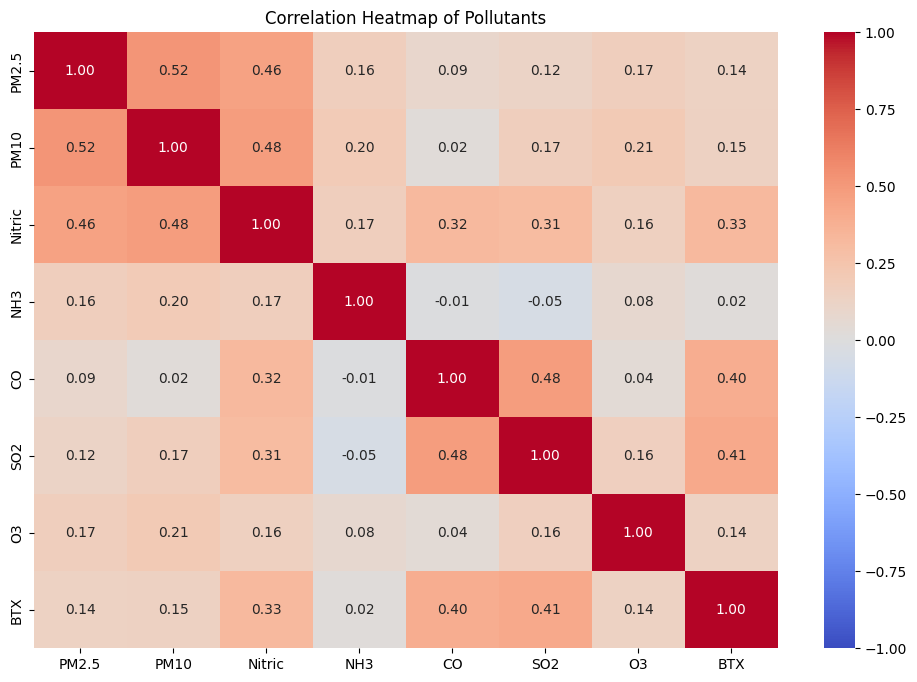

In [ ]:

# Filter the DataFrame to include only numeric columns
# This assumes you want to include only the pollutants columns
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']
numeric_pollutants_df = df1[pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_pollutants_df = numeric_pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_pollutants_df = numeric_pollutants_df

# Calculate the correlation matrix
correlation_matrix = numeric_pollutants_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pollutants')
plt.show()


In [ ]:
numeric_pollutants_df.corr()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it contains the pollutant columns
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Filter the DataFrame to include only the pollutant columns
pollutants_df = df1[pollutants]

# Ensure all columns are numeric
pollutants_df = pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
pollutants_df = pollutants_df.dropna()

# Create scatter plots between each pair of pollutants
# Use pairplot from seaborn to plot all pairwise scatter plots
sns.pairplot(pollutants_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots of Pollutants', y=1.02)
plt.show()


## **Top 10 polluted Cities (based on Pollutants)**

Let's now look at the Indian cities which contribute to maximum pollution. We shall output the top 10 cities in each pollutant category by mean concentration of the pollutant over the years.

In [ ]:
def max_polluted_city(pollutants):
    x1 = df[[pollutants,'City']].groupby(["City"]).mean().sort_values(by=pollutants,ascending=False).reset_index()
    x1[pollutants] = round(x1[pollutants],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [ ]:
from IPython.display import display_html

def display_side_by_side(*args):
    # Convert each DataFrame's Styler object to HTML and join them together
    html_str = ''
    for df in args:
        html_str += df._repr_html_()  # Use _repr_html_ to get the HTML representation
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

# Example usage with your top pollutant DataFrames
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('Nitric')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')
nh3=max_polluted_city('NH3')
ozone=max_polluted_city('O3')
air_qua=max_polluted_city('AQI')

# Display the DataFrames side by side
display_side_by_side(pm2_5, pm10, no2, so2, co, btx,nh3,ozone,air_qua)


,City,PM2.5
0,Patna,123.500000
1,Delhi,117.200000
2,Gurugram,117.100000
3,Lucknow,109.710000
4,Ahmedabad,67.850000
5,Kolkata,64.360000
6,Jorapokhar,64.230000
7,Brajrajnagar,64.060000
8,Guwahati,63.690000
9,Talcher,61.410000


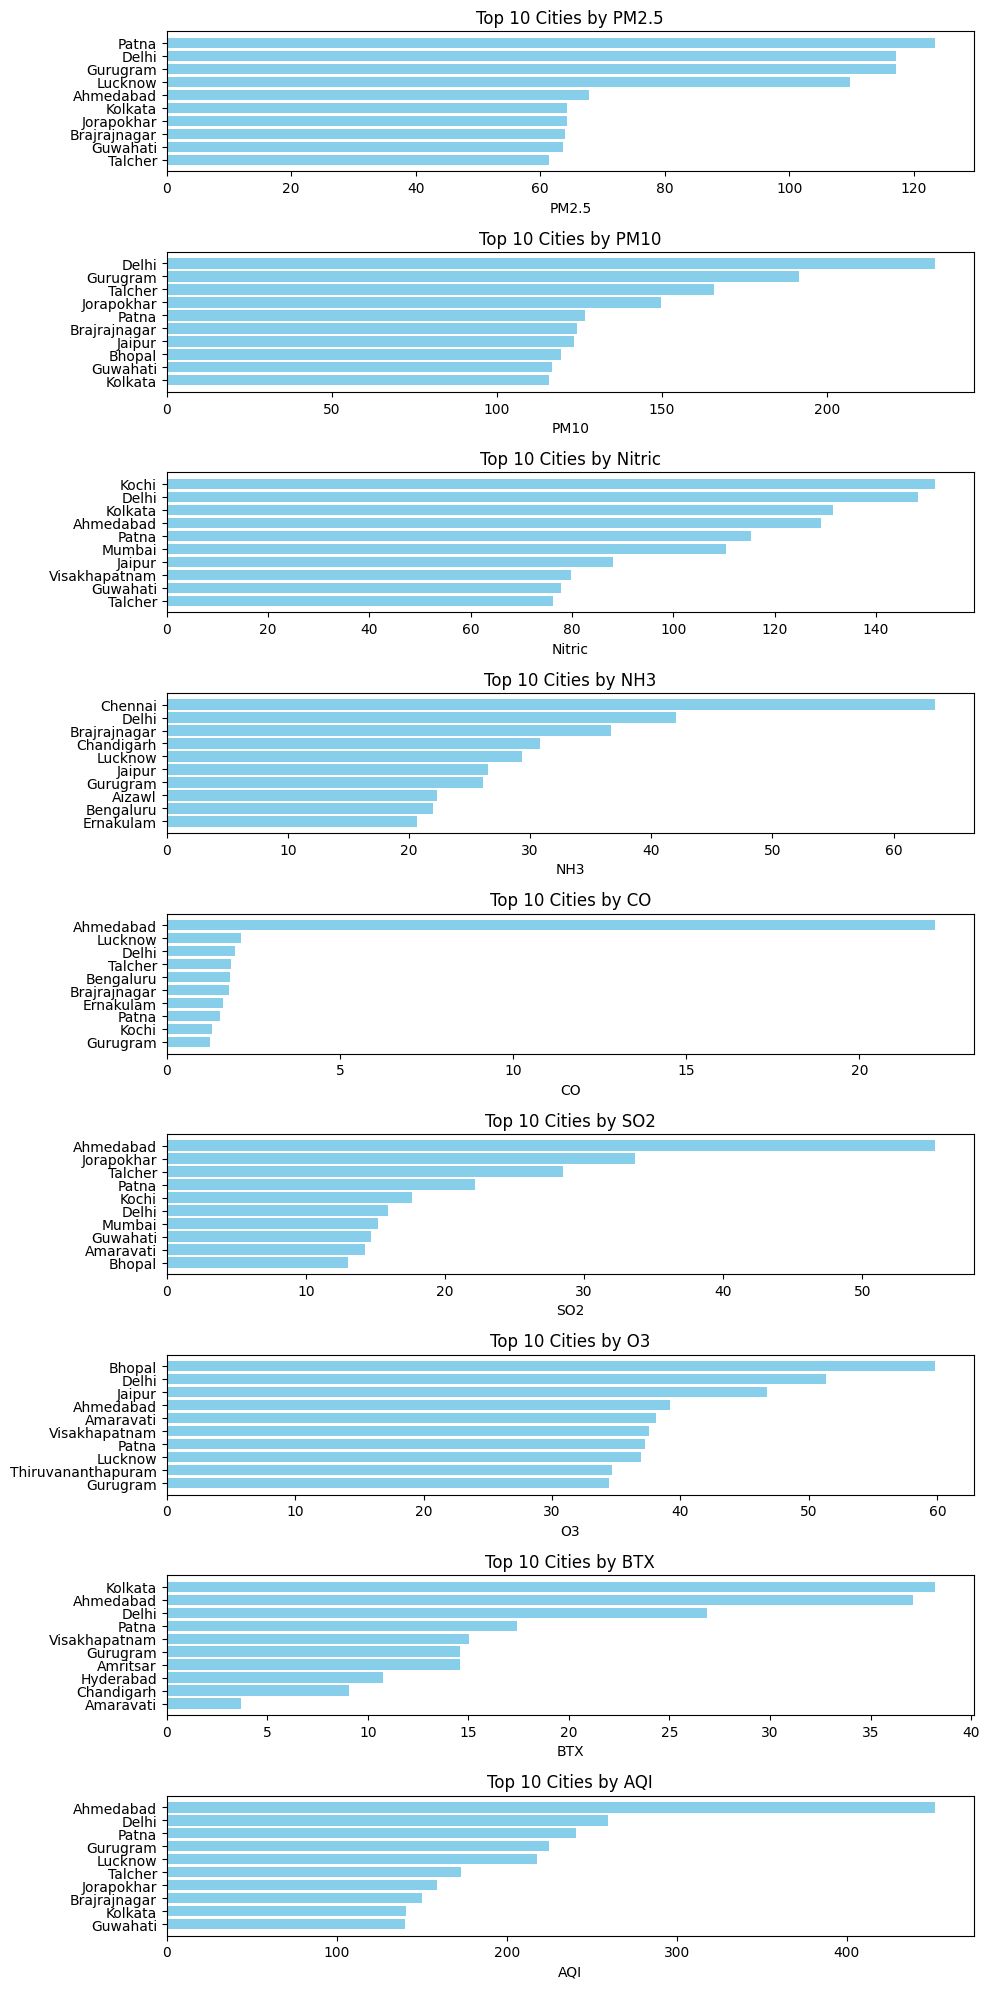

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with pollutant data
pollutant_columns = ['PM2.5','PM10','Nitric', 'NH3','CO', 'SO2','O3', 'BTX','AQI']

# Step 1: Group by city and calculate mean pollutant concentrations
mean_pollutant_by_city = df.groupby('City')[pollutant_columns].mean()

# Step 2: Find the top 10 cities for each pollutant
top_cities = {}
for pollutant in pollutant_columns:
    top_cities[pollutant] = mean_pollutant_by_city[pollutant].sort_values(ascending=False).head(10)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_cities[pollutant].index, top_cities[pollutant].values, color='skyblue')
    axes[i].set_title(f'Top 10 Cities by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()


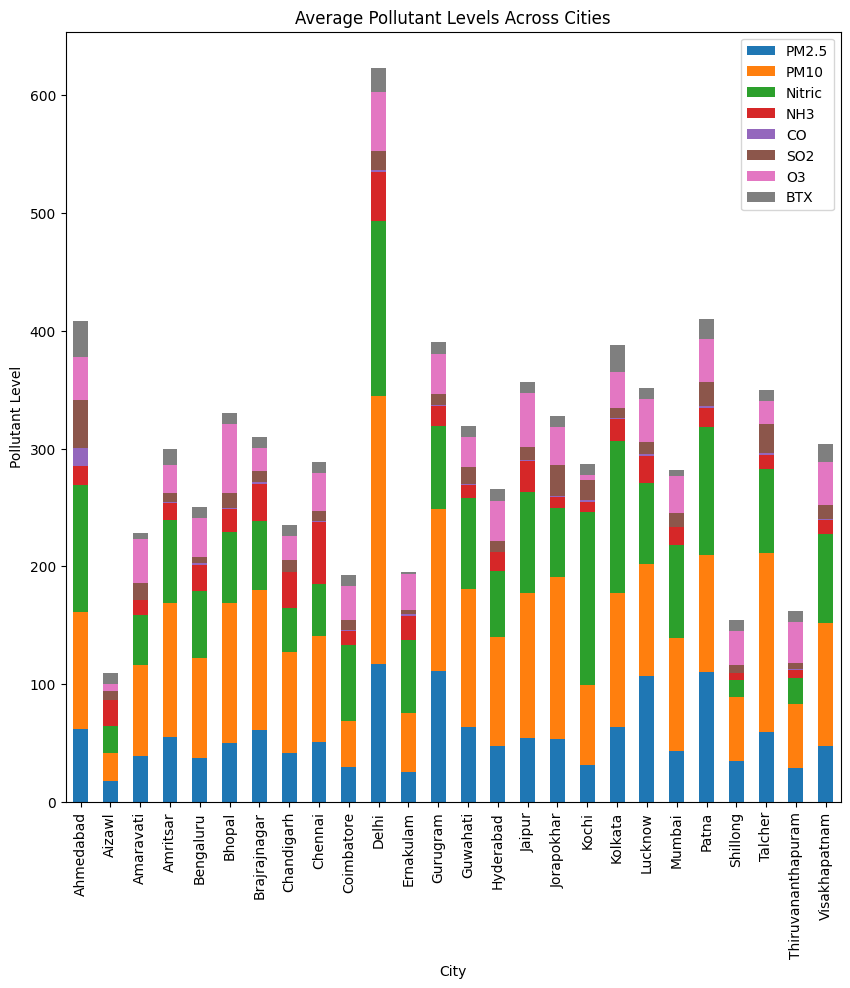

In [ ]:
# Define the pollutant columns
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Calculate the average levels of pollutants for each city
city_pollution = df1.groupby('City')[pollutants].mean()

import matplotlib.pyplot as plt

# Plotting the average pollutants for each city
city_pollution.plot(kind="bar",
                 figsize=(10,10),
                 stacked=True)
plt.title('Average Pollutant Levels Across Cities')
plt.xlabel('City')
plt.ylabel('Pollutant Level')
plt.show()


## **Top 10 polluted Cities (based on AQI values)**

Let's now look at the Indian cities which contribute to maximum pollution using the AQI values. We shall output the top 10 cities in each pollutant category by mean concentration of the AQI values over the years.

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# Calculate the average AQI for each city
average_aqi_by_city = df.groupby('City')['AQI'].mean().reset_index()

# Sort the cities by average AQI in descending order to find the most polluted
most_polluted_cities = average_aqi_by_city.sort_values(by='AQI', ascending=False)

# Display the top 10 most polluted cities
top_10_most_polluted_cities = most_polluted_cities.head(25)
print(top_10_most_polluted_cities)


                  City         AQI
0            Ahmedabad  452.122939
10               Delhi  259.487744
21               Patna  240.782042
12            Gurugram  225.123882
19             Lucknow  217.973059
23             Talcher  172.886819
16          Jorapokhar  159.251621
6         Brajrajnagar  150.280505
18             Kolkata  140.566313
13            Guwahati  140.111111
15              Jaipur  133.679159
5               Bhopal  132.827338
3             Amritsar  119.920959
25       Visakhapatnam  117.269855
8              Chennai  114.502654
14           Hyderabad  109.207447
20              Mumbai  105.352258
17               Kochi  104.284810
7           Chandigarh   96.498328
2            Amaravati   95.299643
4            Bengaluru   94.318325
11           Ernakulam   92.359477
24  Thiruvananthapuram   75.878327
9           Coimbatore   73.023256
22            Shillong   53.795122


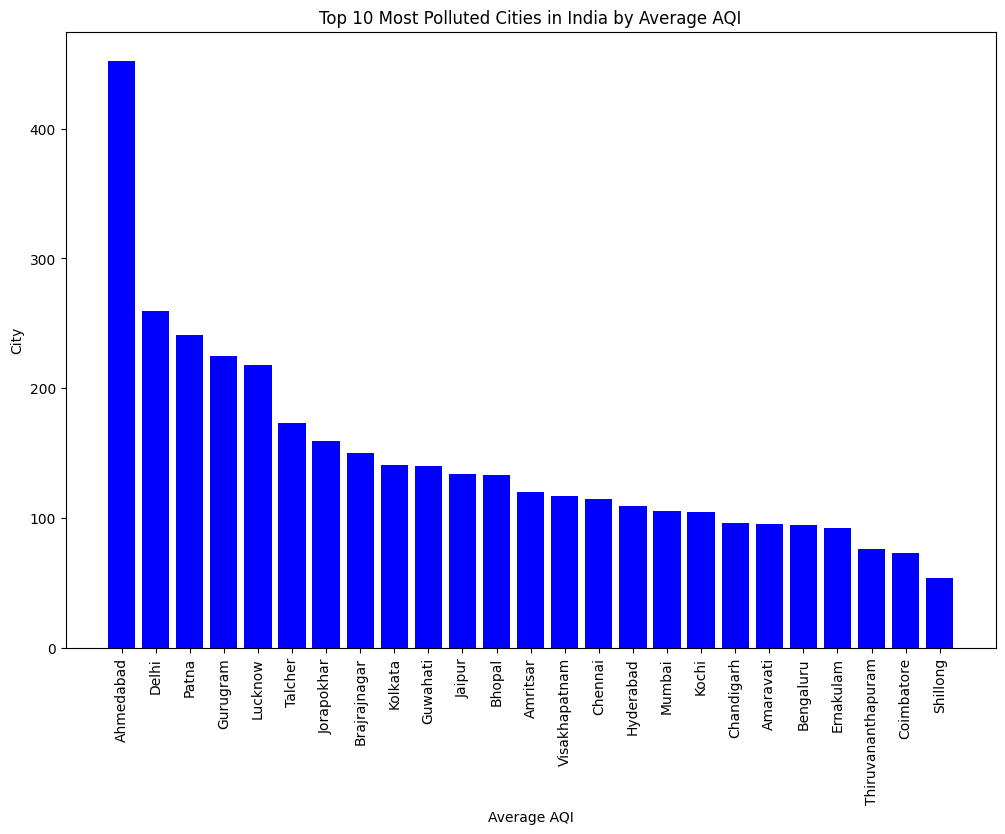

In [ ]:
import matplotlib.pyplot as plt

# Bar chart to show the average AQI of the top 10 most polluted cities
plt.figure(figsize=(12, 8))
plt.bar(top_10_most_polluted_cities['City'], top_10_most_polluted_cities['AQI'], color='blue')
plt.xlabel('Average AQI')
plt.xticks(rotation=90);
plt.ylabel('City')
plt.title('Top 10 Most Polluted Cities in India by Average AQI')
plt.show()


### **Observations:**

Here we see that Delhi has the highest AQI value among all the cities for the period of 2015-2020.
The next highest is Patna and the city with lowest AQI is Shillong.

In [ ]:
delhi_df1=df1[df1.City == 'Delhi']
patna_df1=df1[df1.City == 'Patna']
gurugram_df1=df1[df1.City == 'Gurugram']
lucknow_df1=df1[df1.City == 'Lucknow']
talcher_df1=df1[df1.City == 'Talcher']

In [ ]:
delhi_df1

,City,month,Year,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI,AQI_Bucket
Date,,,,,,,,,,,,,
2015-01-01,Delhi,1,2015,313.22,607.98,216.14,33.85,15.20,9.25,41.68,49.06,472.0,Severe
2015-01-02,Delhi,1,2015,186.18,269.55,183.10,31.83,9.54,6.65,29.97,34.93,454.0,Severe
2015-01-03,Delhi,1,2015,87.18,131.90,103.99,69.55,10.61,2.65,19.71,16.13,143.0,Moderate
2015-01-04,Delhi,1,2015,151.84,241.84,110.54,130.36,11.54,4.63,25.36,17.31,319.0,Very Poor
2015-01-05,Delhi,1,2015,146.60,219.13,87.18,122.88,9.20,3.33,23.20,11.97,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Delhi,6,2020,39.80,155.94,54.81,31.43,0.87,10.38,18.88,22.11,112.0,Moderate
2020-06-28,Delhi,6,2020,59.52,308.65,58.13,29.27,0.94,10.70,18.05,28.58,196.0,Moderate
2020-06-29,Delhi,6,2020,44.86,184.12,54.01,27.97,0.88,11.58,26.61,27.06,233.0,Poor


In [ ]:
delhi_df1_yr=delhi_df1.groupby('Year')[selected_columns[4:13]].mean()
delhi_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2015,117.340822,227.415014,165.132110,47.512356,5.255151,12.606904,57.395507,15.728932,297.024658
2016,138.502842,254.262869,189.816175,42.385273,1.610082,18.792022,76.857869,9.315055,300.868852
2017,124.671425,236.214110,143.056959,44.600000,0.697753,19.390795,39.618712,10.573315,253.306849
2018,115.019397,240.110247,139.677808,42.397123,1.407068,13.642959,44.372438,28.977534,249.158904
2019,108.501479,215.047808,130.597808,36.401205,1.371616,14.031205,38.941014,33.885699,232.104110
2020,80.317978,157.034208,94.734372,34.106776,1.057760,13.912404,40.649891,23.374645,181.672131


In [ ]:
patna_df1_yr=patna_df1.groupby('Year')[selected_columns[4:13]].mean()
patna_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2015,113.979533,95.680000,131.654112,15.850000,1.789533,6.920514,12.008738,3.775654,206.023364
2016,132.404481,95.680000,108.476038,15.850000,1.672350,6.564863,17.507814,1.797951,239.480874
2017,107.485945,95.680000,113.626849,15.850000,1.159945,11.567041,28.625068,5.155945,200.205479
2018,120.725068,95.680000,87.166877,15.850000,1.529671,37.499041,60.397589,40.376658,232.367123
2019,104.212904,97.908658,89.100164,16.322466,1.556384,41.355068,58.594521,30.801890,216.610959
2020,61.321694,123.660984,158.658033,17.539399,1.133333,8.608634,24.968142,8.943497,162.251366


In [ ]:
gurugram_df1_yr=gurugram_df1.groupby('Year')[selected_columns[4:13]].mean()
gurugram_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2015,48.570000,95.680000,41.676857,15.850000,1.426286,7.639143,17.352857,9.280000,118.000000
2016,106.540765,95.680000,49.883716,15.850000,1.334536,7.215628,28.303443,9.280000,188.396175
2017,157.188822,96.501151,57.017863,15.850000,1.833918,8.518164,31.766521,9.280000,268.260274
2018,113.599671,183.366384,100.580493,15.850000,0.897205,8.183562,31.784849,9.280000,226.197260
2019,93.883397,182.016192,81.402658,15.850000,0.903753,13.622411,37.795041,9.280000,195.010959
2020,67.017923,134.434754,61.658634,22.511694,1.126885,9.801257,51.373989,12.740492,158.655738


In [ ]:
lucknow_df1_yr=lucknow_df1.groupby('Year')[selected_columns[4:13]].mean()
lucknow_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2015,89.275123,95.68,29.296356,15.850000,4.961534,19.812411,34.649726,9.28,183.542466
2016,119.710410,95.68,55.476803,15.850000,2.067377,6.894317,42.438005,9.28,232.046448
2017,121.605836,95.68,78.519397,21.556219,1.722685,7.263918,44.263808,9.28,236.638356
2018,119.245534,95.68,99.638630,38.342986,1.042603,9.084658,32.672247,9.28,233.772603
2019,98.088658,95.68,80.324822,22.759863,1.230411,7.684630,32.225014,9.28,202.561644
2020,76.865082,95.68,68.020273,19.810383,1.196995,7.712514,32.677104,9.28,157.125683


In [ ]:
talcher_df1_yr=talcher_df1.groupby('Year')[selected_columns[4:13]].mean()
talcher_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2017,48.570000,95.680000,58.810000,15.850000,1.746667,9.160000,20.578333,9.28,118.000000
2018,64.386959,155.304548,84.016192,17.490904,1.695507,25.584164,21.597836,9.28,162.358904
2019,50.326712,169.457014,70.414877,9.185452,1.728164,26.313370,8.847671,9.28,160.356164
2020,65.491639,115.338962,48.611913,8.359454,1.621858,19.633224,37.477760,9.28,154.393443


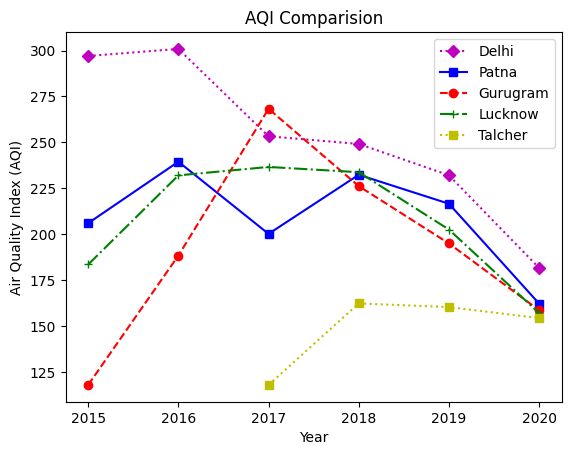

In [ ]:
plt.plot(delhi_df1_yr.index,delhi_df1_yr.AQI,'D:m')
plt.plot(patna_df1_yr.index,patna_df1_yr.AQI,'s-b')
plt.plot(gurugram_df1_yr.index,gurugram_df1_yr.AQI,'o--r')
plt.plot(lucknow_df1_yr.index,lucknow_df1_yr.AQI,'+-.g')
plt.plot(talcher_df1_yr.index,talcher_df1_yr.AQI,'s:y')

plt.xlabel('Year')
plt.ylabel('Air Quality Index (AQI)')

plt.title('AQI Comparision')
plt.legend(['Delhi','Patna','Gurugram','Lucknow','Talcher']);

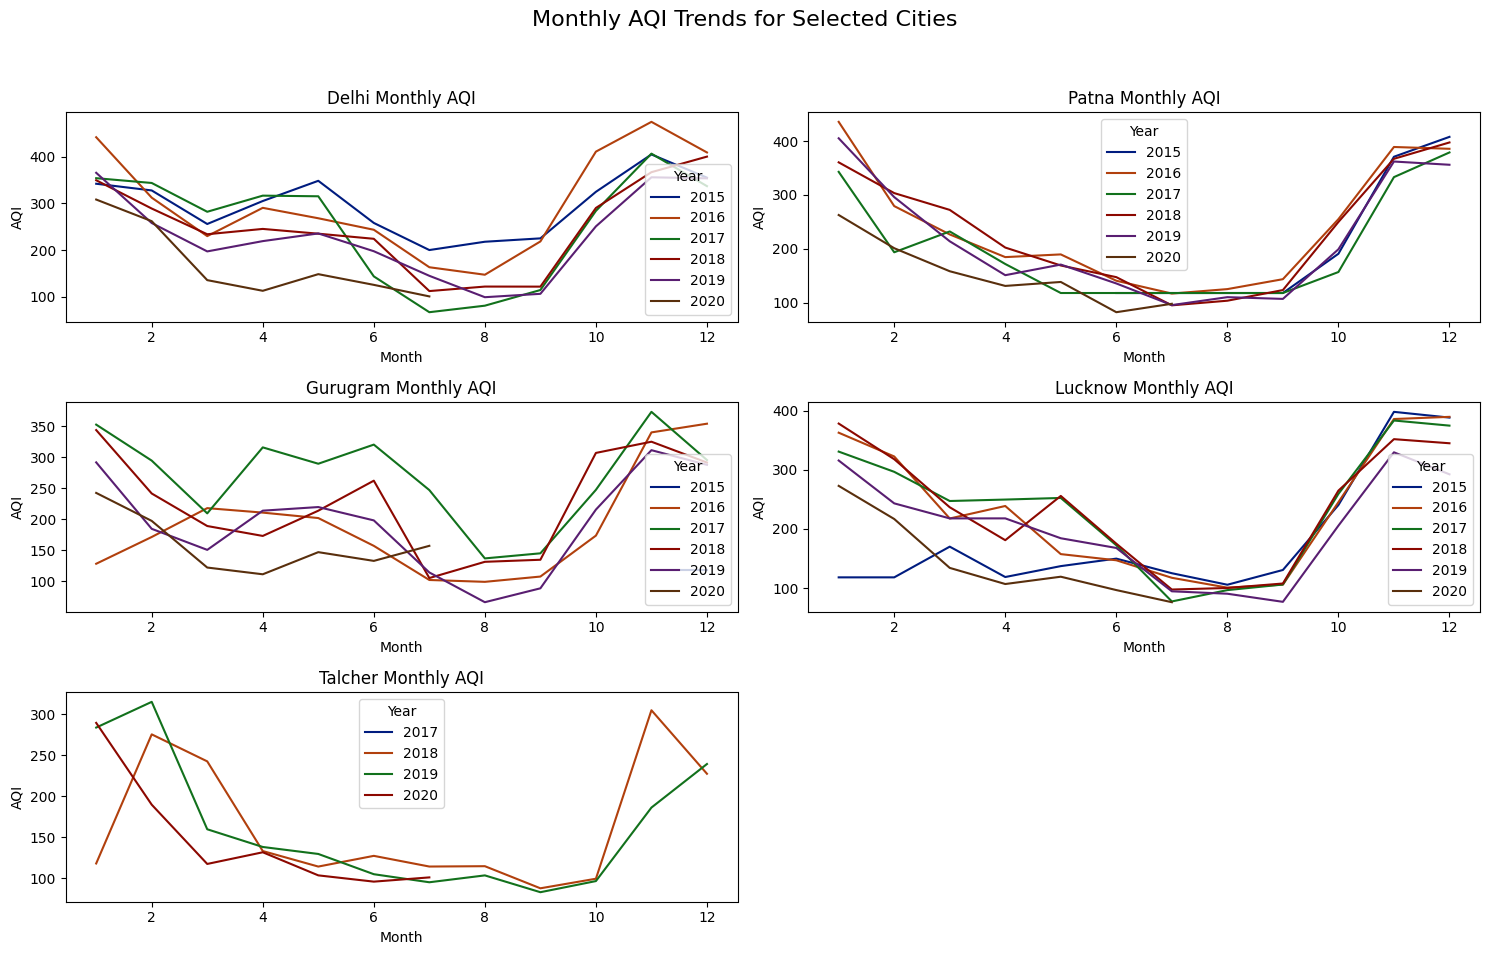

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the cities you're interested in
cities_ = ['Delhi', 'Patna', 'Gurugram', 'Lucknow', 'Talcher']

# Create a figure with 5 subplots (one for each city)
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing
fig.suptitle('Monthly AQI Trends for Selected Cities', fontsize=16)

for i, city in enumerate(cities_):
    city_df = df1[df1['City'] == city]

    # Group by 'Year' and 'month' and calculate the mean for AQI
    city_monthly_avg = city_df.groupby(['Year', 'month'])['AQI'].mean().reset_index()

    # Plotting the AQI trend for each city
    sns.lineplot(
        data=city_monthly_avg,
        x='month', y='AQI', hue='Year', palette='dark',
        markers=True, dashes=False, ax=axes[i]
    )
    axes[i].set_title(f'{city} Monthly AQI')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('AQI')

# Hide the last subplot if not used
if len(cities_) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust the layout to make room for the titles and labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [ ]:
aqi_df=df1[['AQI','AQI_Bucket']]
aqi_df

,AQI,AQI_Bucket
Date,,
2015-01-01,118.0,moderate
2015-01-02,118.0,moderate
2015-01-03,118.0,moderate
2015-01-04,118.0,moderate
2015-01-05,118.0,moderate
...,...,...
2020-06-27,41.0,Good
2020-06-28,70.0,Satisfactory
2020-06-29,68.0,Satisfactory


In [ ]:
aqi_df.dropna()

,AQI,AQI_Bucket
Date,,
2015-01-01,118.0,moderate
2015-01-02,118.0,moderate
2015-01-03,118.0,moderate
2015-01-04,118.0,moderate
2015-01-05,118.0,moderate
...,...,...
2020-06-27,41.0,Good
2020-06-28,70.0,Satisfactory
2020-06-29,68.0,Satisfactory


In [ ]:
idx=['Good','Satisfactory','Moderate','Poor','Very Poor','Severe']
aqi_bucket_df=aqi_df.AQI_Bucket.value_counts().to_frame().reindex(idx)
aqi_bucket_df.reset_index(inplace=True)
aqi_bucket_df.columns=['AQI_Bucket','Count']
aqi_bucket_df

,AQI_Bucket,Count
0,Good,1341
1,Satisfactory,8224
2,Moderate,8829
3,Poor,2781
4,Very Poor,2337
5,Severe,1338


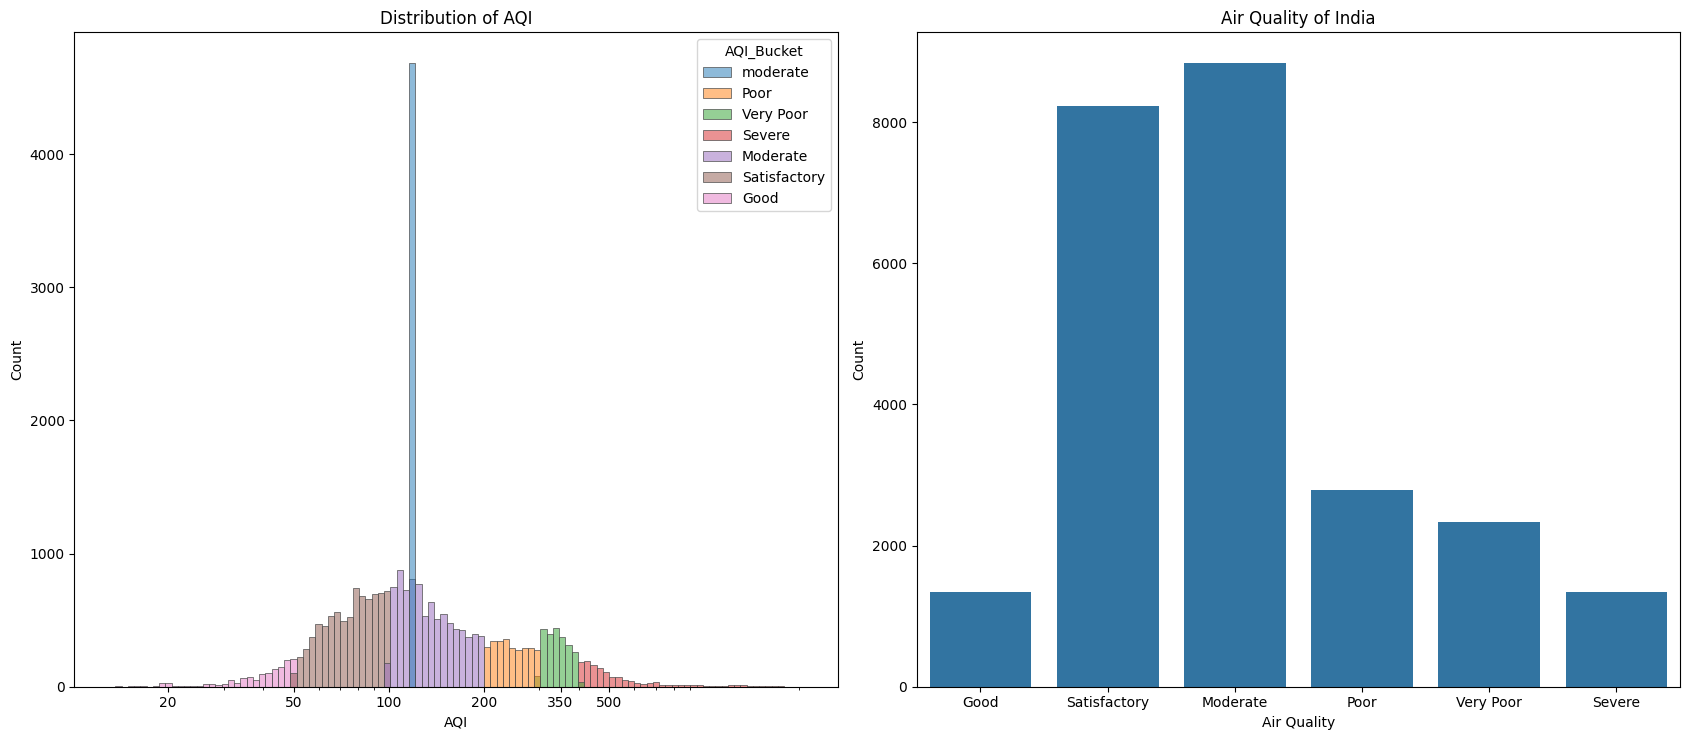

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Example DataFrame; replace with your actual DataFrames
# aqi_df is your DataFrame with 'AQI' and 'AQI_Bucket' columns
# aqi_bucket_df is your DataFrame with 'AQI_Bucket' and 'Count' columns

fig, ax = plt.subplots(1, 2, figsize=(17, 7.5), squeeze=False)

# Drawing the histogram for AQI values
sns.histplot(aqi_df, x='AQI', hue='AQI_Bucket', edgecolor=".3", linewidth=.5, log_scale=True, ax=ax[0,0])
ax[0,0].xaxis.set_major_formatter(ticker.ScalarFormatter())
ax[0,0].set_xticks([20,50,100,200,350,500])
ax[0,0].set_title("Distribution of AQI")

# Drawing the bar chart for AQI_Bucket values
sns.barplot(x='AQI_Bucket', y='Count', data=aqi_bucket_df, ax=ax[0,1])
ax[0,1].set_title('Air Quality of India')
ax[0,1].set_ylabel('Count')
ax[0,1].set_xlabel('Air Quality')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and contains the required columns

# List of pollutants
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Calculate the average level of each pollutant for each city
city_pollutants_df = df1.groupby('City')[pollutants].mean().reset_index()

# Melt the DataFrame to get it into long format suitable for plotting
city_pollutants_melted = city_pollutants_df.melt(id_vars='City', var_name='Pollutant', value_name='Level')

# List of cities to plot
cities = ['Delhi', 'Patna', 'Gurugram', 'Lucknow', 'Talcher']

# Filter the melted DataFrame to include only the cities of interest
city_pollutants_melted = city_pollutants_melted[city_pollutants_melted['City'].isin(cities)]


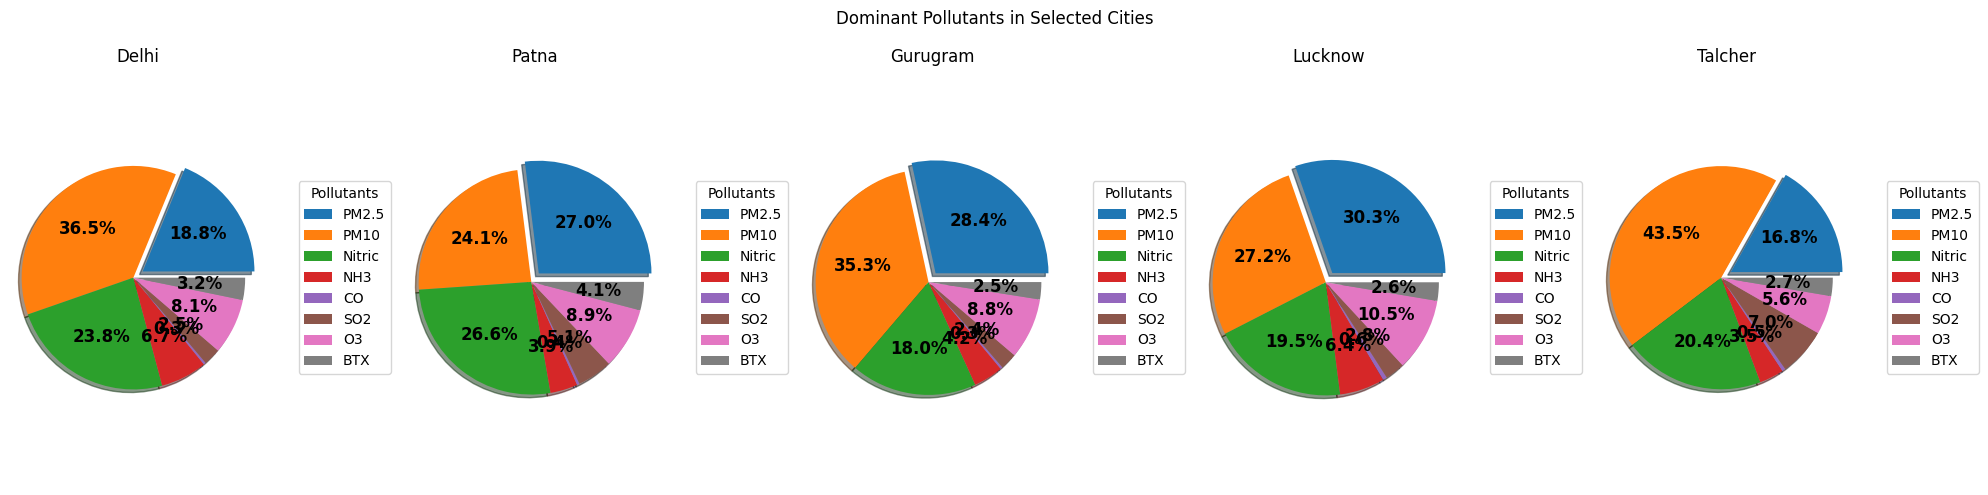

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for each city
fig, axes = plt.subplots(1, len(cities), figsize=(20, 5), squeeze=False)
fig.suptitle('Dominant Pollutants in Selected Cities')

for i, city in enumerate(cities):
    # Filter the DataFrame for the current city
    city_data = city_pollutants_melted[city_pollutants_melted['City'] == city]

    # Ensure the DataFrame is not empty
    if city_data.empty:
        continue

    # Pie chart parameters
    labels = city_data['Pollutant']
    levels = city_data['Level']
    explode = [0.1] + [0] * (len(labels) - 1)  # Explode the first slice (most dominant pollutant)

    # Plotting the pie chart
    wedges, texts, autotexts = axes[0, i].pie(
        levels,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=0
    )

    # Setting title and properties
    axes[0, i].set_title(f'{city}')
    axes[0, i].axis('equal')  # Ensures the pie chart is drawn as a circle

    # Adding legend
    axes[0, i].legend(
        wedges,
        labels,
        title="Pollutants",
        loc="center left",
        bbox_to_anchor=(1.1, 0, 0.5, 1)
    )

    # Setting the properties of the percentage texts
    plt.setp(autotexts, size=12, weight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to make room for the suptitle

# Display the plot
plt.show()


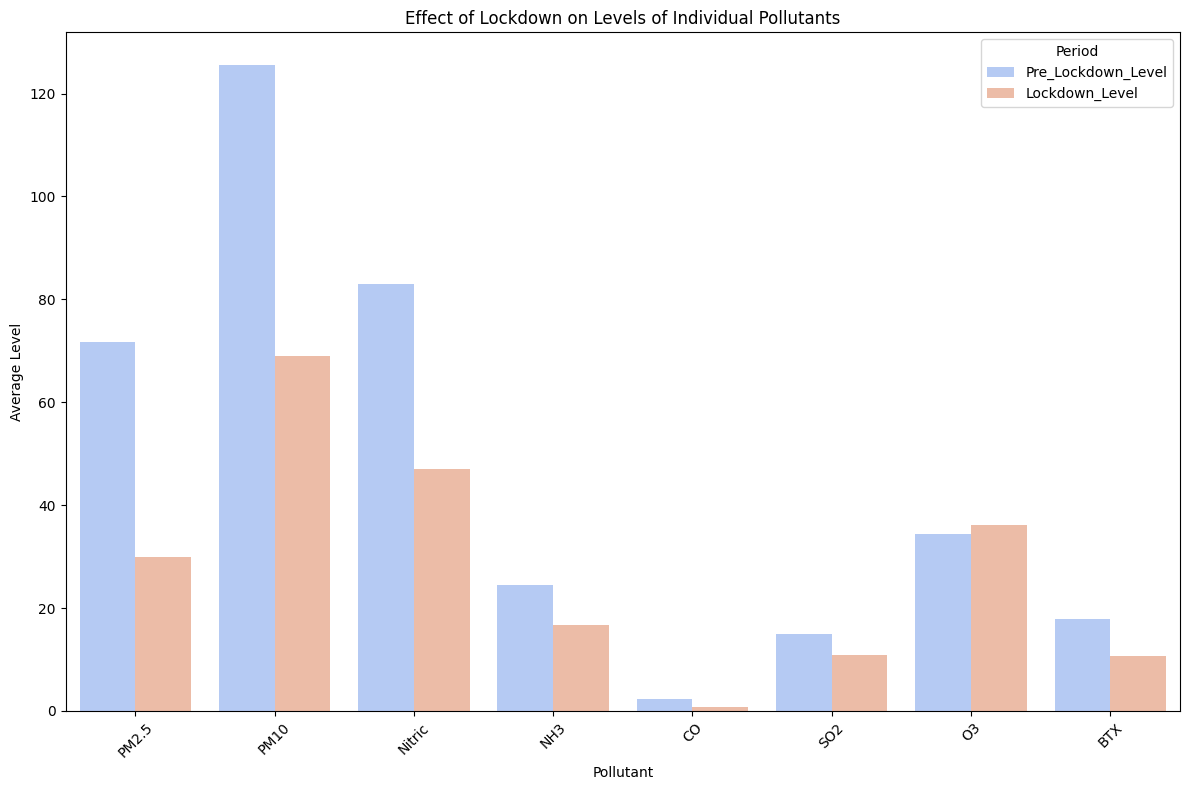

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define lockdown period (you may need to adjust these dates based on your specific lockdown dates)
lockdown_start = '2020-03-25'  # Example lockdown start date
lockdown_end = '2020-05-31'    # Example lockdown end date

# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for lockdown period
lockdown_data = df[(df['Date'] >= lockdown_start) & (df['Date'] <= lockdown_end)]

# Filter data for pre-lockdown period
pre_lockdown_data = df[df['Date'] < lockdown_start]

# Define pollutants
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Calculate average levels of each pollutant during lockdown
lockdown_avg = lockdown_data[pollutants].mean().reset_index()
lockdown_avg.columns = ['Pollutant', 'Lockdown_Level']

# Calculate average levels of each pollutant before lockdown
pre_lockdown_avg = pre_lockdown_data[pollutants].mean().reset_index()
pre_lockdown_avg.columns = ['Pollutant', 'Pre_Lockdown_Level']

# Merge the two DataFrames
comparison_df = pd.merge(pre_lockdown_avg, lockdown_avg, on='Pollutant')

# Plot the comparison
plt.figure(figsize=(12, 8))

# Melt the DataFrame for easier plotting with seaborn
melted_df = comparison_df.melt(id_vars='Pollutant', var_name='Period', value_name='Level')

# Plot
sns.barplot(x='Pollutant', y='Level', hue='Period', data=melted_df, palette='coolwarm')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Effect of Lockdown on Levels of Individual Pollutants')
plt.xlabel('Pollutant')
plt.ylabel('Average Level')
plt.legend(title='Period')
plt.tight_layout()

plt.show()
